## 1. Librerías

In [1]:
!pip install matplotlib mahotas opencv-python scikit-image

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpi
from PIL import Image
import mahotas
import mahotas.demos
%matplotlib inline

## 2. Lectura de Imágenes

### 2.1. Lectura de imagen en escala de grises con OpenCV

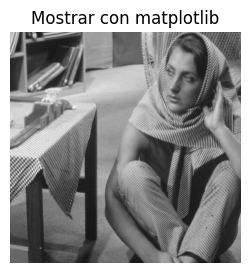

In [3]:
def mostrar_imagen(location, title, use_matplotlib=True):
    imagen = cv2.imread(location)
    if imagen is None:
        raise ValueError(f"No se pudo cargar la imagen desde la ubicación: {location}")
    if use_matplotlib:
        # Convertir BGR a RGB para mostrar correctamente con matplotlib
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(3,3))
        plt.imshow(imagen)
        plt.title(title)
        plt.axis("off")
        plt.show()
    else:
        cv2.imshow(title, imagen)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


mostrar_imagen("./imagenes/barbara.png", "Mostrar con matplotlib")
mostrar_imagen("./imagenes/barbara.png", "Mostrar con OpenCV", False)

### 2.2. Lectura de imagen a color con OpenCV

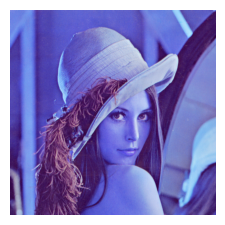

In [4]:
def mostrar_imagen_color(x):
    imagen = cv2.imread(x)
    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1)
    plt.imshow(imagen)
    plt.axis("off")

mostrar_imagen_color("./imagenes/_lena.png")

### 2.3. Lectura de imágenes con Matplotlib

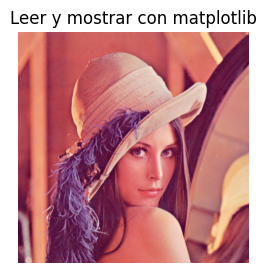

In [5]:
def mostrar_con_pyplot(ruta_imagen):
    imagen = mpi.imread(ruta_imagen)
    plt.figure(figsize=(3,3))
    plt.imshow(imagen)
    plt.title("Leer y mostrar con matplotlib")
    plt.axis("off")

mostrar_con_pyplot('./imagenes/_lena.png')

### 2.4. Lectura de imágenes con PIL

In [6]:
def mostrar_con_pil(ruta_imagen):
    im = Image.open(ruta_imagen)
    im.show()

mostrar_con_pil('./imagenes/_lena.png')

## 3. Crear y Grabar Imágenes

### 3.1. Imagen en escala de grises

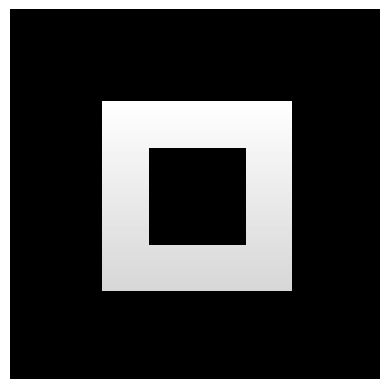

In [13]:
def crear_grises():
    d = (80, 80)
    img = np.zeros(d)
    # Asegurarse de que el rango y el segmento del array tengan la misma forma
    img[20:61, 20:61] = np.arange(255, 214, -1)[:, None]
    img[30:51, 30:51] = 0
    img = np.uint8(img)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()

crear_grises()


### 3.2. Imagen a color

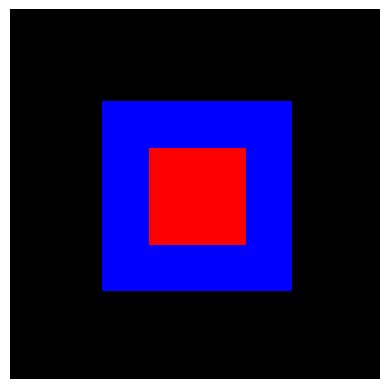

In [14]:
def crear_color():
    f, c = 80, 80
    img = np.zeros((f, c, 3), dtype=np.uint8)
    img[20:61, 20:61] = [0, 0, 255]
    img[30:51, 30:51] = [255, 0, 0]
    plt.imshow(img)
    plt.axis("off")

crear_color()

### 3.3. Grabar imagen

In [15]:
def grabar_imagen(nombre_archivo, img):
    cv2.imwrite(nombre_archivo, img)

### 3.4. Grabar video

In [16]:
def grabar_video(source=0, output='captura.mp4', fps=30, size=(640, 480), codec='mp4v'):
    vreader = cv2.VideoCapture(source)
    fourcc = cv2.VideoWriter_fourcc(*codec)
    vwriter = cv2.VideoWriter(output, fourcc, fps, size)
    while True:
        ret, frame = vreader.read()
        if not ret:
            break
        cv2.imshow('Captura en tiempo real', frame)
        vwriter.write(frame)
        if cv2.waitKey(1) & 0xFF == ord('x'):
            break
    vreader.release()
    vwriter.release()
    cv2.destroyAllWindows()

## 4. Estructura de una Imagen

### 4.1. Tamaño de la imagen

Tipo de dato: uint8
Dimensiones: 512 x 512
Resolución: 262144


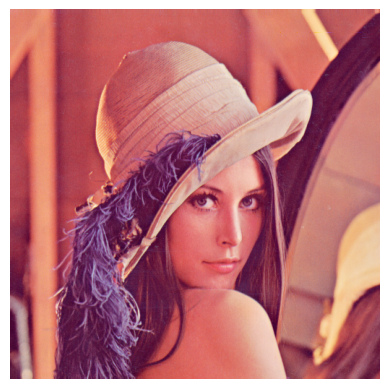

In [17]:
def mostrar_tamano_imagen(location):
    imagen = cv2.imread(location)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    print(f"Tipo de dato: {imagen.dtype}")
    print(f"Dimensiones: {imagen.shape[0]} x {imagen.shape[1]}")
    print(f"Resolución: {imagen.shape[0] * imagen.shape[1]}")

mostrar_tamano_imagen("./imagenes/_lena.png")